In [1]:
# Setup plotting
import matplotlib.pyplot as plt
import tensorflow as tf
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)



2022-10-20 13:42:18.879338: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


The *Red Wine Quality* dataset consists of physiochemical measurements from about 1600 Portuguese red wines.  Also included is a quality rating for each wine from blind taste-tests. 

First, run the next cell to display the first few rows of this dataset.

In [2]:
import pandas as pd

red_wine = pd.read_csv('wine.csv')
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
red_wine.shape # (rows, columns)

(1599, 12)

In [4]:
red_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

#### For this dataset, quality is the label, while first 11 columns are features. Hence, the neural network we build should have 11 inputs and 1 output. 

## Basic Sequential Layer

In [5]:

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

In [6]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([layers.Dense(units=5,input_shape=[11]),
                          layers.Dense(units=5),
                         layers.Dense(units=1)])


2022-10-20 13:42:26.149235: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
model = keras.Sequential([layers.Dense(units=5,input_shape=[2]),
                         layers.Dense(units=1)])

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 5)                 15        
                                                                 
 dense_4 (Dense)             (None, 1)                 6         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.get_weights()

[array([[ 0.61149144,  0.53488064, -0.2529595 ,  0.43418717,  0.6730386 ],
        [ 0.3418492 ,  0.32679832, -0.8630084 ,  0.3914485 , -0.8451165 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.7133317 ],
        [ 0.3029871 ],
        [ 0.24664521],
        [-0.7152109 ],
        [-0.09236145]], dtype=float32),
 array([0.], dtype=float32)]

## Adding Layers and Activation functions

First comparing: 

    1. GD
    2. SGD
    3. SGD with momentum
    4. NGD
    5. AdaGrad

In [37]:
opt1 = tf.keras.optimizers.SGD(learning_rate=0.01)
opt2 = tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.8)
opt3 = tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.8,nesterov=True)
opt4 = tf.keras.optimizers.Adagrad(
    learning_rate=0.01,
    initial_accumulator_value=0.001,
    epsilon=1e-07,
    name="Adagrad"
)


In [10]:
def optmodel(opt,bsize):
    model = keras.Sequential([layers.Dense(units=20,activation="relu",input_shape=[11]),
                         layers.Dense(units=20, activation="relu"),
                          layers.Dense(units=20, activation="relu"),
                         layers.Dense(units=1)])
    model.compile(optimizer=opt,loss="mae")
    history=model.fit(X_train, y_train,validation_data=(X_valid, y_valid),batch_size=bsize, epochs=400,verbose=0)
    return(history.history)
    
    

In [11]:
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head())

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6
979,12.2,0.450,0.49,1.40,0.075,3.0,6.0,0.99690,3.13,0.63,10.4,5


In [14]:
l=len(X_train)

In [41]:
h0=optmodel(opt1,1119)

In [42]:
h1=optmodel(opt1,256)
h2=optmodel(opt2,256)
h3=optmodel(opt3,256)
h4=optmodel(opt4,256)
h5=optmodel(opt5,256)

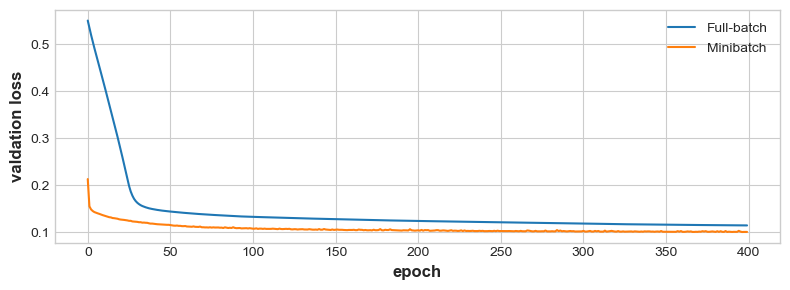

In [47]:
plt.figure(figsize=(8,3))
#plt.plot(history1.history["val_loss"][10:],label="250")
plt.plot(h0["val_loss"],label="Full-batch")

plt.plot(h1["val_loss"],label="Minibatch")
plt.legend(loc="best")
plt.xlabel("epoch")
plt.ylabel("valdation loss")
#plt.xticks()
plt.show()

#### Full-batch never reaches as low as Minibatch in loss because it is overfitting

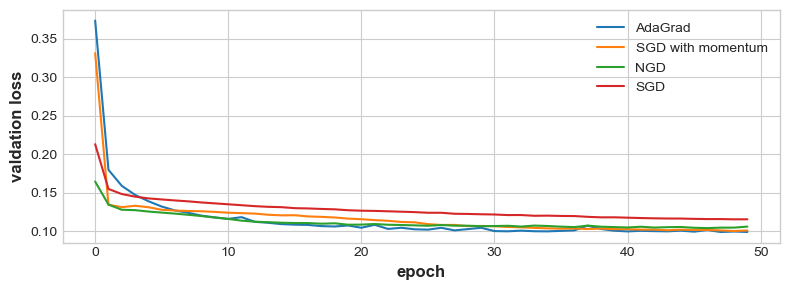

In [49]:
plt.figure(figsize=(8,3))
#plt.plot(history1.history["val_loss"][10:],label="250")

plt.plot(h4["val_loss"][:50],label="AdaGrad")
plt.plot(h2["val_loss"][:50],label="SGD with momentum")
plt.plot(h3["val_loss"][:50],label="NGD")
plt.plot(h1["val_loss"][:50],label="SGD")
plt.legend(loc="best")
plt.xlabel("epoch")
plt.ylabel("valdation loss")
#plt.xticks()
plt.show()

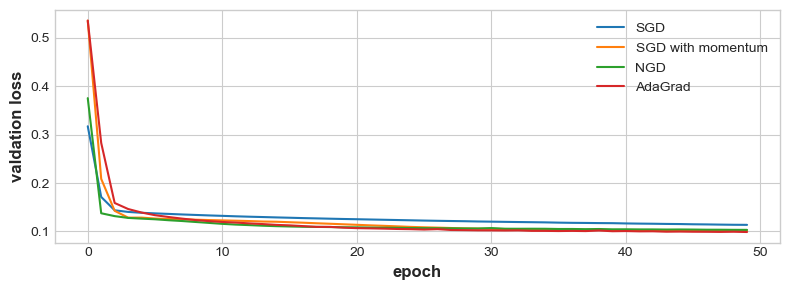

In [90]:
plt.figure(figsize=(8,3))
#plt.plot(history1.history["val_loss"][10:],label="250")

plt.plot(h1["loss"][:50],label="SGD")
plt.plot(h2["loss"][:50],label="SGD with momentum")
plt.plot(h3["loss"][:50],label="NGD")
plt.plot(h4["loss"][:50],label="AdaGrad")
plt.legend(loc="best")
plt.xlabel("epoch")
plt.ylabel("valdation loss")
#plt.xticks()
plt.show()

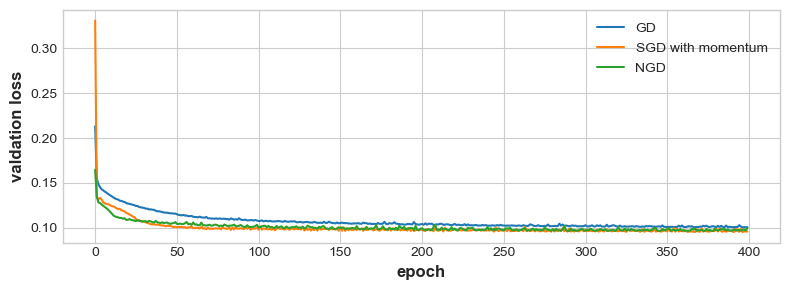

In [53]:
plt.figure(figsize=(8,3))
#plt.plot(history1.history["val_loss"][10:],label="250")
plt.plot(h1["val_loss"],label="GD")
plt.plot(h2["val_loss"],label="SGD with momentum")
plt.plot(h3["val_loss"],label="NGD")
plt.legend(loc="best")
plt.xlabel("epoch")
plt.ylabel("valdation loss")
#plt.xticks()
plt.show()

Adding AdaDelta

In [18]:
def optmodel2(lr,rho):
    opt= tf.keras.optimizers.Adadelta(
    learning_rate=lr, rho=rho, epsilon=1e-07, name="Adadelta")
    model = keras.Sequential([layers.Dense(units=20,activation="relu",input_shape=[11]),
                         layers.Dense(units=20, activation="relu"),
                          layers.Dense(units=20, activation="relu"),
                         layers.Dense(units=1)])
    model.compile(optimizer=opt,loss="mae")
    history=model.fit(X_train, y_train,validation_data=(X_valid, y_valid),batch_size=l, epochs=400,verbose=0)
    return(history.history)
    

In [97]:
ad1=optmodel2(0.01, 0.9)
ad2=optmodel2(0.01, 0.94)
ad3=optmodel2(0.01, 0.97)
ad4=optmodel2(0.02, 0.99)

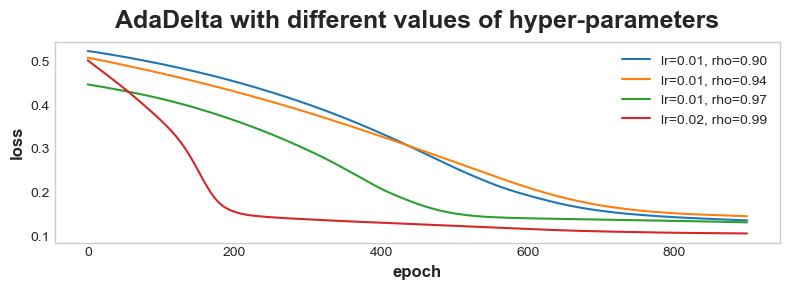

In [109]:
plt.figure(figsize=(8,3))
#plt.plot(h4["loss"],label="AdaGrad")
plt.plot(ad1["loss"],label="lr=0.01, rho=0.90")
plt.plot(ad2["loss"],label="lr=0.01, rho=0.94")
plt.plot(ad3["loss"],label="lr=0.01, rho=0.97")
plt.plot(ad4["loss"],label="lr=0.02, rho=0.99")
#plt.plot(ad5["loss"],label="lr=0.05, rho=0.99")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(loc="best")
plt.grid(False)
plt.title("AdaDelta with different values of hyper-parameters")
#plt.xticks()
plt.show()

In [19]:
ad5=optmodel2(0.1, 0.99)
ad6=optmodel2(0.3, 0.99)
ad7=optmodel2(0.5, 0.99)

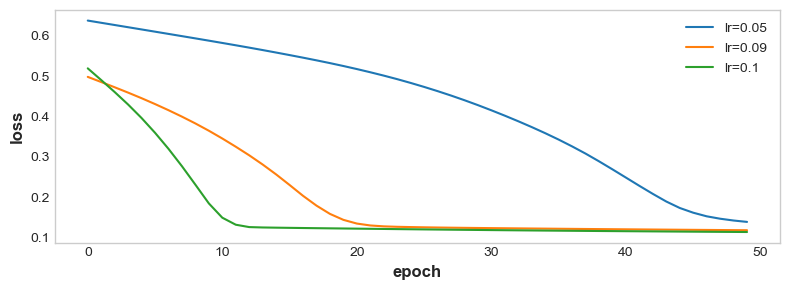

In [20]:
plt.figure(figsize=(8,3))

plt.plot(ad5["loss"][:50],label="lr=0.05")
plt.plot(ad6["loss"][:50],label="lr=0.09")
plt.plot(ad7["loss"][:50],label="lr=0.1")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(loc="best")
plt.grid(False)
#plt.title("AdaDelta with different values of hyper-parameters")
#plt.xticks()
plt.show()

In [23]:
opt6=tf.keras.optimizers.RMSprop(
    learning_rate=0.1,
    rho=0.99,
    epsilon=1e-07,
    name="RMSprop"
)

In [24]:
rms1=optmodel(opt6,l)

In [26]:
# plt.figure(figsize=(8,3))

# plt.plot(ad6["loss"][10:400],label="AdaGrad")
# plt.plot(rms1["loss"][10:],label="RMSprop")
# plt.legend(loc="best")
# plt.xlabel("epoch")
# plt.ylabel("loss")

# plt.show()

#### ADAM

In [12]:
opt7=tf.keras.optimizers.Adam(
    learning_rate=0.09,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam")

In [15]:
adam1=optmodel(opt7,l)

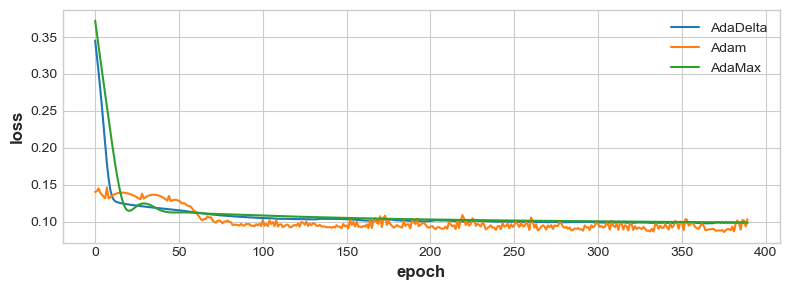

In [30]:
plt.figure(figsize=(8,3))

plt.plot(ad6["loss"][10:],label="AdaDelta")
plt.plot(adam1["loss"][10:],label="Adam")
plt.plot(adamax["loss"][10:],label="AdaMax")
plt.legend(loc="best")
plt.xlabel("epoch")
plt.ylabel("loss")

plt.show()

In [27]:
opt8=tf.keras.optimizers.Adamax(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Adamax"
)

In [28]:
adamax=optmodel(opt8,l)